In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time
import statsmodels.api as sm

In [3]:
plt.style.use('fivethirtyeight')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [4]:
# Import File
file = 'bar_x_sales_export.csv'

In [5]:
def import_parse(file):

    data = pd.read_csv(file, index_col = 'date', parse_dates=True)
    df = pd.DataFrame(data)

    #Filter all zero values
    df = df.query('Sales > 0').copy()
    df.dropna(inplace=True)
    
    print(f'"{file}" has been imported + parsed. The file has {len(df)} rows.')
    return df

df = import_parse(file);

"bar_x_sales_export.csv" has been imported + parsed. The file has 873 rows.


In [6]:
df.isnull().sum()

Sales    0
dtype: int64

In [7]:
# Review File Import
df.head()
df.tail()

,Sales
date,
2017-01-02,427.01
2017-01-03,1920.37
2017-01-04,439.41
2017-01-05,946.57
2017-01-06,3053.26


,Sales
date,
2019-05-29,672.38
2019-05-30,1042.85
2019-05-31,3311.61
2019-06-01,4516.92
2019-06-02,952.45


In [8]:
# Analysis Dates
start_date = '2017-01-01' # Start Date Inclusive
end_date = '2019-06-01' # End Date Exclusive

In [9]:
def filter_df(df, start_date, end_date):
    
    return df[(df.index > start_date) & (df.index < end_date)]
    
dfx = filter_df(df, start_date, end_date)

In [10]:
def daily_average_matrix(df):
    
    matrix = df.groupby([df.index.dayofweek, df.index.month, df.index.year]).agg({'Sales': 'mean'})
    matrix = matrix.rename_axis(['day', 'month', 'year'])
    return matrix.unstack(level=1)

daily_average_matrix(dfx)
    

Sales                                                 \
month            1           2          3          4            5    
day year                                                             
0   2017   516.3860   647.48250  1183.9425   491.2050   543.816000   
    2018   497.7525   407.79750  1252.3050   313.9940   475.595000   
    2019   449.1125   381.10750   625.6675   390.3160   440.072500   
1   2017   878.5540   688.02000   819.7400   780.1650   727.966000   
    2018   808.3400  1208.02000   610.0475   775.2675   759.864000   
    2019   766.6375   580.39750   686.0950   934.6300   815.617500   
2   2017   829.3400  1149.60250  1090.1660   858.7200   955.394000   
    2018   725.4540  1342.47750   717.5500   995.0500   776.454000   
    2019   735.0040   649.08750  1626.9850  1120.8225   716.862000   
3   2017  1355.0125  1357.96000   908.7360  1166.2575  1293.222500   
    2018  1183.1725  1066.41475  1345.5960  1346.2375  1545.610505   
    2019  1157.4340  1268.69000  1112.1200  1728.0250  1403.620000   
4   2017  2827.9725  3204.24750  3060.9860  2949.0750  3289.650000   
    2018  3065.4600  4349.03750  4042.1680  4316.6850  3706.467500   
    2019  3487.0125  4170.30000  3691.6700  4244.4200  3902.230000   
5   2017  2920.9700  3991.26250  3673.6275  3290.3240  3079.322500   
    2018  4337.5900  4444.53750  4625.7580  4243.9700  3694.255000   
    2019  3573.1525  4498.55500  4450.1420  4623.2500  4610.585000   
6   2017  1074.6900  1550.90000   643.9475   761.9100  1310.082500   
    2018   678.0800  1070.21750   705.7325   744.2500  1853.280000   
    2019   743.0425   747.23250   799.1100   662.0525  1955.124000   

                                                                           \
month              6            7            8            9            10   
day year                                                                    
0   2017   555.365000  1212.406000   533.020000   418.412500   529.060000   
    2018  1573.685511   376.968794   690.178243   455.241160   902.620590   
    2019          NaN          NaN          NaN          NaN          NaN   
1   2017   729.102500   691.960000   779.938000   496.820000  1074.068000   
    2018  1676.605227  1065.680822   800.896800   715.204696   737.921757   
    2019          NaN          NaN          NaN          NaN          NaN   
2   2017   830.735000   637.622500   665.670000   645.045000   876.327500   
    2018  1161.861426  1137.068591   971.995906  1286.541929  1667.758492   
    2019          NaN          NaN          NaN          NaN          NaN   
3   2017  1025.390000  1074.647500  1182.468000  1332.415000   762.650000   
    2018  1236.101679  1115.645611  1361.021963  1242.712945  1014.373708   
    2019          NaN          NaN          NaN          NaN          NaN   
4   2017  2912.632000  2128.480000  3182.207500  3674.406000  3193.820000   
    2018  4080.084032  3189.473347  3908.243814  4170.388811  3877.366825   
    2019          NaN          NaN          NaN          NaN          NaN   
5   2017  3354.785000  2944.338000  2830.012500  3136.190000  3370.617500   
    2018  4341.739711  3875.997336  4075.045577  3768.836186  4195.143800   
    2019          NaN          NaN          NaN          NaN          NaN   
6   2017   675.692500   605.934000   533.185000   941.972500   662.100000   
    2018   652.400316   892.488110   726.787170  1332.109718   418.156200   
    2019          NaN          NaN          NaN          NaN          NaN   

                                    
month              11           12  
day year                            
0   2017   735.852500   661.856667  
    2018  1154.696929  1509.830296  
    2019          NaN          NaN  
1   2017   631.415000   585.697500  
    2018   903.176949   806.985511  
    2019          NaN          NaN  
2   2017  1548.482000   820.735000  
    2018  1003.392882   857.146338  
    2019          NaN          NaN  
3   2017  1570.897500  1510.247500  
   

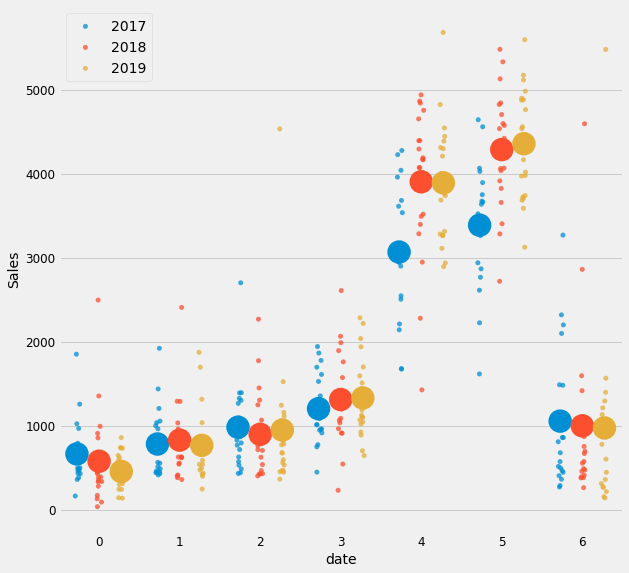

In [11]:
# Year over Year

dfm = dfx[dfx.index.month < 6] # Analyzing Months 1 through 5

plt.figure(figsize=(9,9))

sns.stripplot(x=dfm.index.dayofweek,
               y=dfm.Sales,
               hue=dfm.index.year,
               data=dfm,
               dodge=0.35,
               alpha=0.75
                );

sns.pointplot(x=dfm.index.dayofweek,
               y=dfm.Sales,
               hue=dfm.index.year,
               data=dfm,
               dodge=0.55,
               alpha=0.85,
               join=False,
               ci=None
                );

plt.legend(['2017', '2018', '2019']);

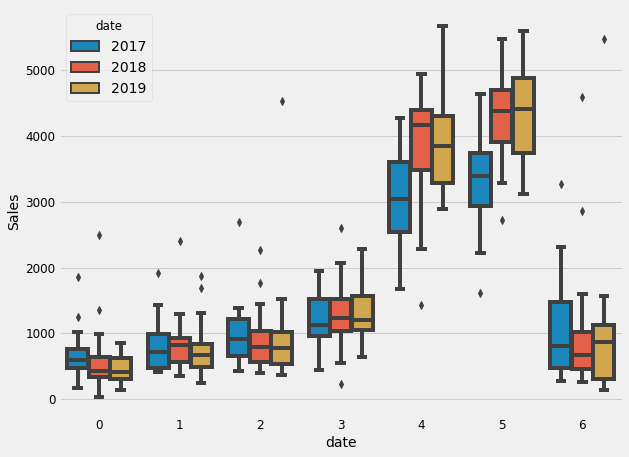

In [12]:
plt.figure(figsize=(9,7))
sns.boxplot(x=dfm.index.dayofweek,
               y=dfm.Sales,
               hue=dfm.index.year,
               data=dfm,
                );

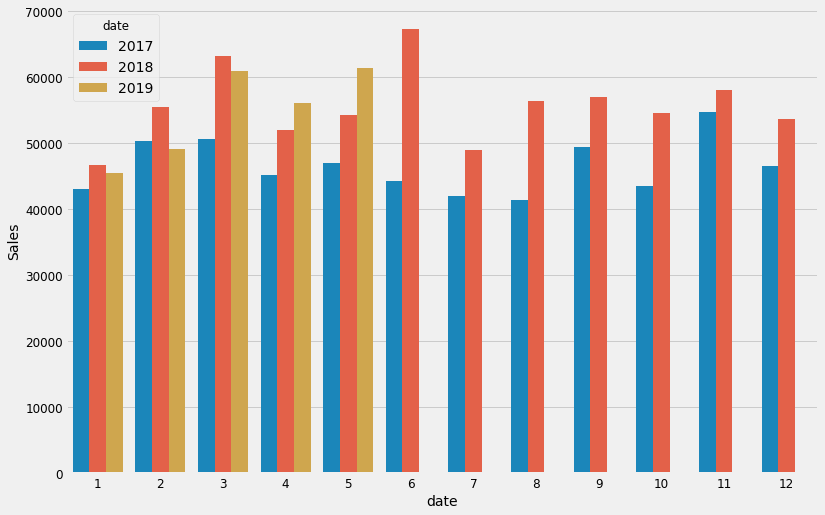

In [13]:
df_monthly = dfx.resample('M').agg({'Sales': 'sum'})
plt.figure(figsize=(12,8))

sns.barplot(x=df_monthly.index.month, y=df_monthly.Sales, hue=df_monthly.index.year, data=df_monthly);

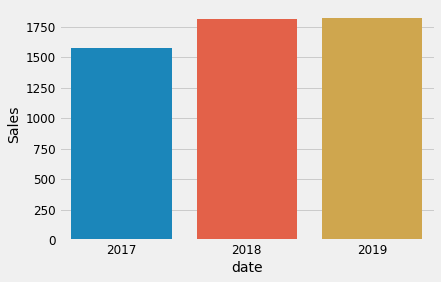

In [18]:
sns.barplot(x=dfm.index.year, y=dfm.Sales, data=dfm, ci=None);


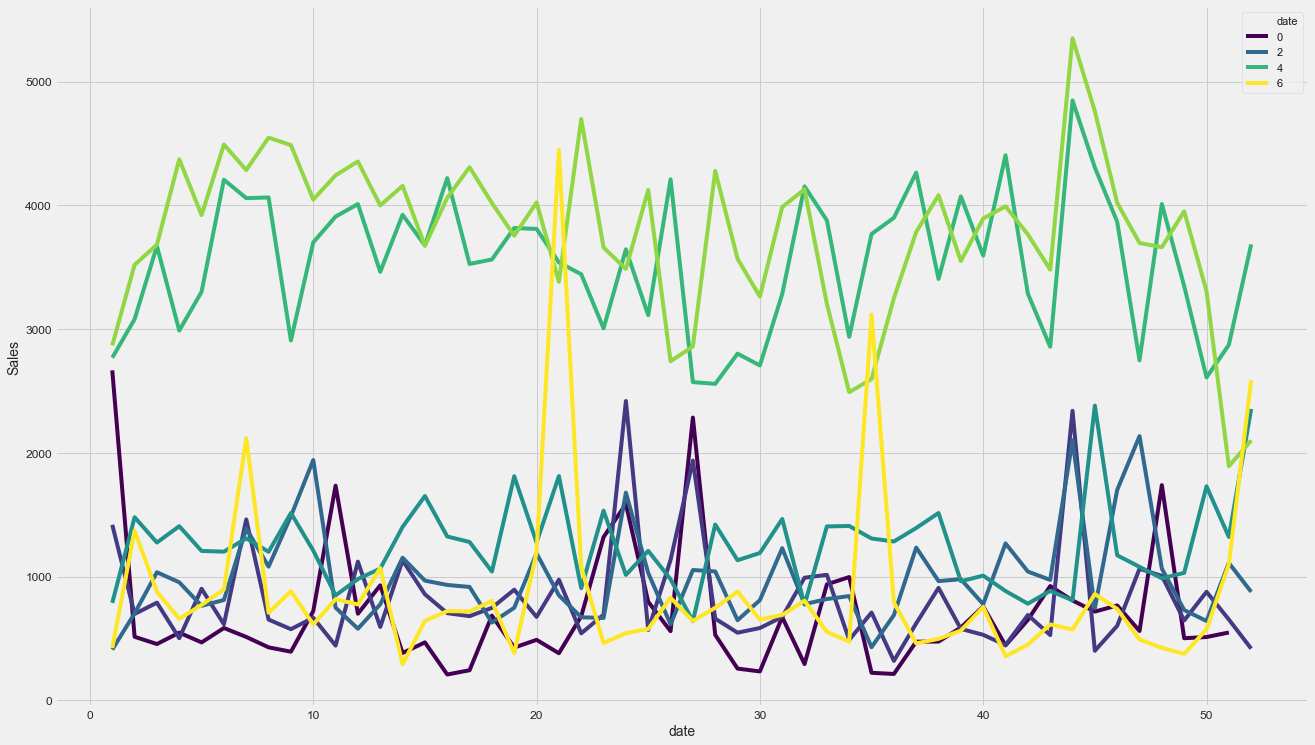

In [244]:
plt.figure(figsize=(20, 12))
sns.lineplot(x=dfx.index.week, y=dfx.Sales, hue=dfx.index.dayofweek, data=dfx, ci=False, palette='viridis');

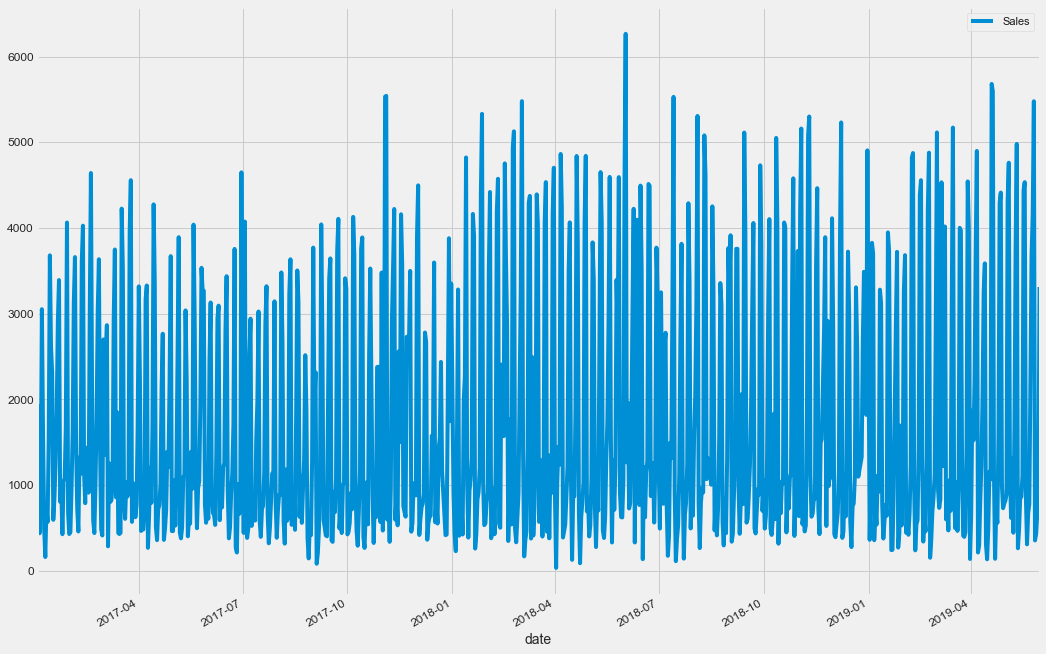

In [245]:
dfx.plot(figsize=(16,12));

In [246]:
dfx = dfx.asfreq(freq='d')

In [247]:
dfx = dfx.fillna(value=0)

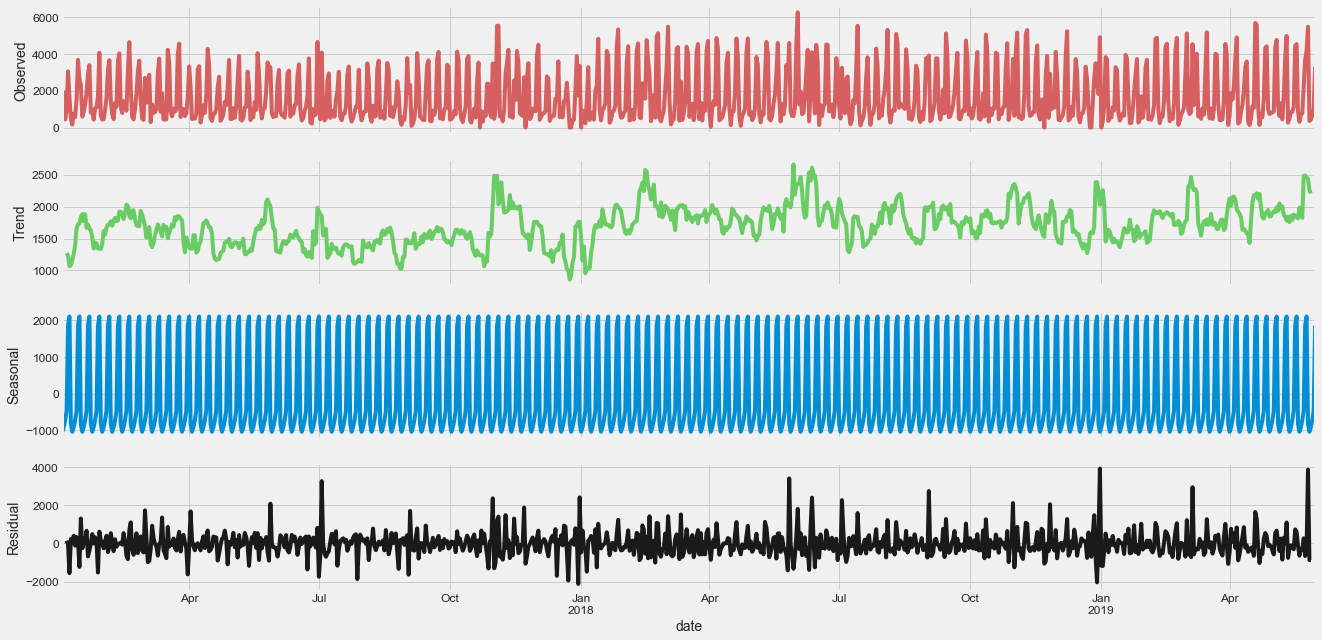

In [252]:
deco = sm.tsa.seasonal_decompose(dfx, model='additive')

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(20,10))

deco.observed.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Observed')

deco.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')

deco.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')

deco.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual');

In [196]:
from statsmodels.tsa.stattools import adfuller

Test Statistic           -3.612244
p-value                   0.005531
# Lags Used              20.000000
Num Observations        850.000000
Critical Value (1%)      -3.438067
Critical Value (5%)      -2.864946
Critical Value (10%)     -2.568584
dtype: float64


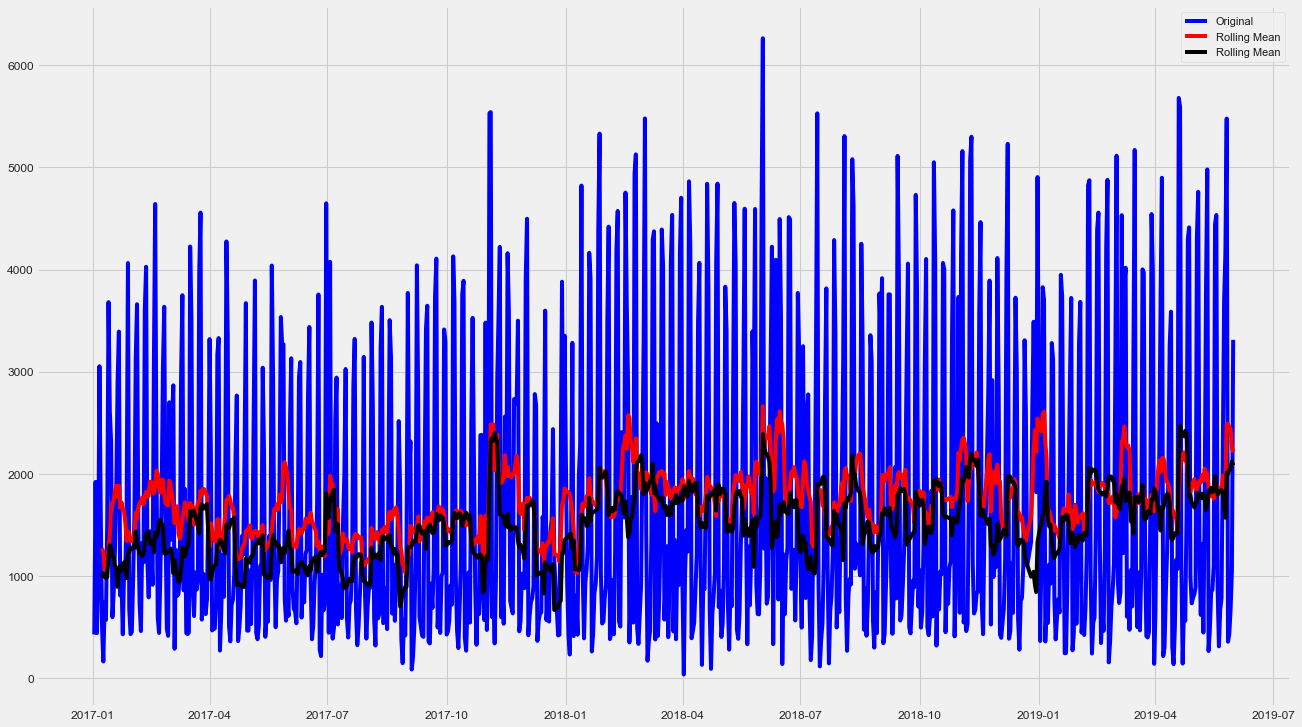

In [205]:
def test_stationarity(df, Sales):
    
    rolmean = dfx['Sales'].rolling(window = 7, center=False).mean()
    rolstd = dfx['Sales'].rolling(window = 7, center=False).std()
    
    plt.figure(figsize=(20, 12))
    
    orig = plt.plot(df['Sales'],
                    color='blue',
                    label = 'Original')
    
    mean = plt.plot(rolmean,
                   color = 'red',
                   label = 'Rolling Mean')
    
    std = plt.plot(rolstd,
                   color = 'black',
                   label = 'Rolling Mean')
    
    plt.legend(loc='best')
    
    dftest = adfuller(dfx['Sales'],
                     autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                        index= ['Test Statistic',
                               'p-value',
                               '# Lags Used',
                               'Num Observations'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df = dfx, Sales='Sales')